# Applied Machine Learning (Week 2)

## Supervised Learning

### Classification and Regression

#### Classification
 
1. Takes target values(labels) a discrete values. 

 * Binary class - Spam detection(spam or not)
 * Multi class  - Fruit recognition(Multiple fruits)
 * Multi label  - Textual data(unlike multi class where fruit can be apple or orange but cant be both, it can have multiple labels)

#### Regression

1. Target values are continuous values.

![title](img/4.png)

![title](img/5.png)

## Datasets 

In [11]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
from sklearn.datasets import make_classification, make_blobs            #generate a n-class classification problem
from sklearn.datasets import make_regression                            #generate a random regression problem
from sklearn.datasets import make_friedman1                             #generate a Friedman1 regression problem
from sklearn.datasets import load_boston

**make_regression(samples, features, no of informative features, targets(default=scalar), bias, noise(SD of gaussian noise), random_state( random generation numbers))**

<IPython.core.display.Javascript object>


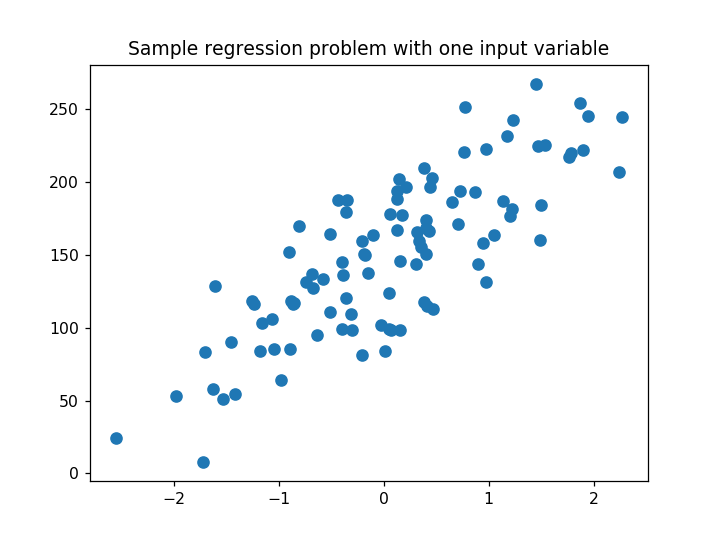

In [13]:
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

**make_friedman1(samples, features, noise, random_state)**

*The regression problem Friedman 1 as described in Friedman (1991) and Breiman (1996). Inputs are 10 independent variables uniformly distributed on the interval [0,1], only 5 out of these 10 are actually used. Outputs are created according to the formula*

y = 10 sin(π x1 x2) + 20 (x3 - 0.5)^2 + 10 x4 + 5 x5 + e

where e is N(0,sd).

<IPython.core.display.Javascript object>


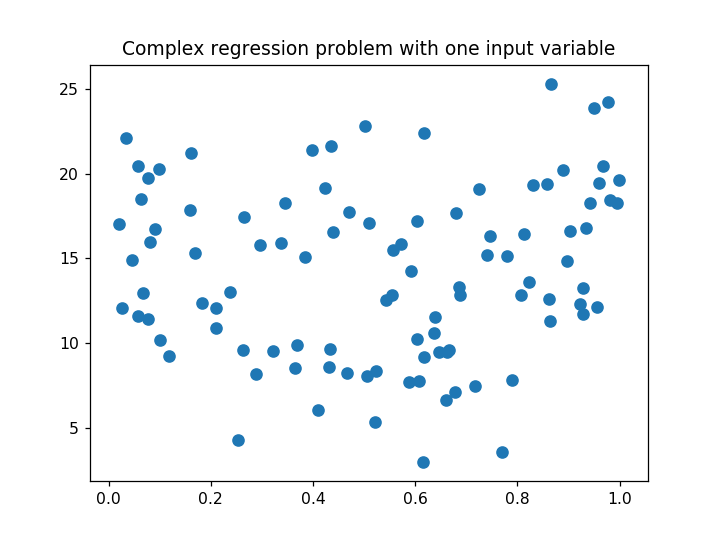

In [15]:
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

**make_classification(samples, features, redundant features, informative features, clusters per class, random_state)**

Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.


*MANY MORE PARAMETERS*

<IPython.core.display.Javascript object>


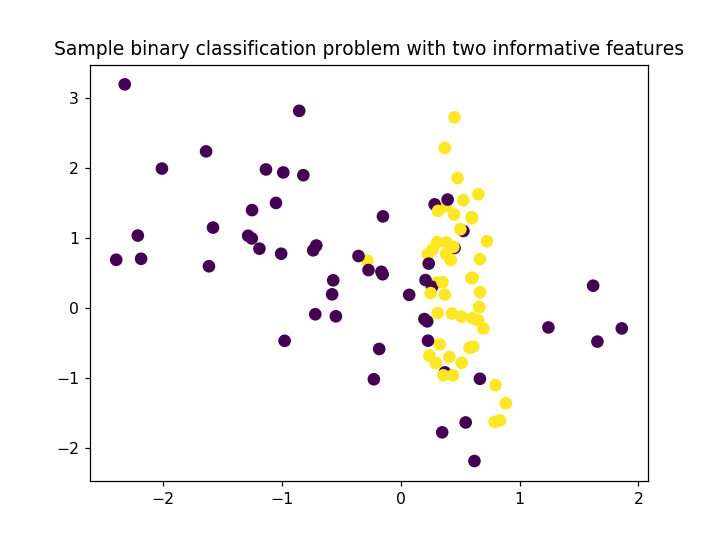

In [190]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()


![title](img/6.png)

## Regression

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
daibetes = load_diabetes()
(X_diab, y_diab) = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_diab, y_diab, random_state = 0)

**KNeighborsRegressor(neighbors, weights, algorithm = 'auto')**

![title](img/7.png)

In [180]:
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
knnreg

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [181]:
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[20.76 29.54 23.08 11.94 21.82 21.4  22.96 24.38 30.24 18.26 10.6  10.8
 16.76 10.38 38.84 25.34 21.98 23.44 24.32 27.28 23.56 20.32 19.02 31.14
 21.16 13.44 18.48 22.46 24.02 17.4  16.04 20.16 19.68 25.   24.6  19.04
 10.38 20.08 13.44 14.7  25.14 21.16 20.18 19.04 20.2  24.12 23.26 21.6
 17.16 20.04 18.26 22.3  28.14 25.4  22.46 22.46 23.4  19.58 10.   22.3
 32.88 20.72 26.32 28.04 22.52 32.88 19.04 18.06 13.9  29.34 31.16 21.82
 24.72 30.94 22.52 10.96 32.1  22.84 25.04 20.46 24.48 18.22 16.38 32.68
 28.02 29.34 23.8  12.7  32.24 20.56 31.76 13.44 22.74 25.02 24.04 22.62
 11.12 25.06 11.66 22.52 29.42 19.56 26.5  28.04 24.7  20.08 12.02 16.76
 22.8  26.32 32.24 16.76 18.06 19.66 16.86 22.12 10.96 17.86 11.96 41.6
 32.88 11.48 28.06 21.44 22.1  19.04 29.42]
R-squared test score: 0.462


![title](img/18.png)

## Linear regression

![title](img/8.png)

In [182]:
from sklearn.linear_model import LinearRegression

![title](img/9.png)

**y = mx + b regression line with the help of attributes coef_ & intercept_ **

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_diab, y_diab,
                                                   random_state = 2)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [-9.81915048e-02  3.48400626e-02 -1.65945367e-02  3.36283135e+00
 -1.61477570e+01  3.57041012e+00  4.56458846e-03 -1.39585375e+00
  3.15975518e-01 -1.20505823e-02 -1.04852815e+00  1.14536184e-02
 -5.52653040e-01]
linear model intercept (b): 38.116
R-squared score (training): 0.734
R-squared score (test): 0.750


![title](img/10.png)

![title](img/11.png)

## Ridge regression

In [184]:
from sklearn.linear_model import Ridge

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_diab, y_diab,
                                                   random_state = 0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

![title](img/19.png)

In [189]:
print('Boston Dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Boston Dataset
linear model intercept: 38.11614126508098
linear model coeff:
[-9.81915048e-02  3.48400626e-02 -1.65945367e-02  3.36283135e+00
 -1.61477570e+01  3.57041012e+00  4.56458846e-03 -1.39585375e+00
  3.15975518e-01 -1.20505823e-02 -1.04852815e+00  1.14536184e-02
 -5.52653040e-01]
R-squared score (training): 0.764
R-squared score (test): 0.658


**Feature normalization(MIN MAX)**

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


![title](img/20.png)

**Ridge regression with regularization parameter : alpha**

In [194]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 11, r-squared training: 0.77, r-squared test: 0.64

Alpha = 1.00
num abs(coeff) > 1.0: 12, r-squared training: 0.77, r-squared test: 0.62

Alpha = 10.00
num abs(coeff) > 1.0: 12, r-squared training: 0.69, r-squared test: 0.51

Alpha = 20.00
num abs(coeff) > 1.0: 12, r-squared training: 0.62, r-squared test: 0.44

Alpha = 50.00
num abs(coeff) > 1.0: 11, r-squared training: 0.50, r-squared test: 0.34

Alpha = 100.00
num abs(coeff) > 1.0: 11, r-squared training: 0.40, r-squared test: 0.27

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.10, r-squared test: 0.07



## Lasso regression

In [195]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_diab, y_diab,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

In [198]:
print('Boston dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

Boston dataset
lasso regression linear model intercept: 22.608707124010557
lasso regression linear model coeff:
[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.001

Features with non-zero weight (sorted by absolute magnitude):


![title](img/21.png)

## Polynomial regression

In [199]:
from sklearn.preprocessing import PolynomialFeatures

In [201]:
poly = PolynomialFeatures(degree=2)     #Transform original data to poly(quadratic)
X_F1_poly = poly.fit_transform(X_diab)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_diab,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))


(poly deg 2) linear model coeff (w):
[-1.13008466e+09 -2.47597055e-01 -5.56247242e-02 -6.00954510e+00
  1.70278129e+01 -2.76113267e+01  4.54425139e+00  1.26546224e+00
 -1.05359932e+01  1.14862606e+00  3.86948959e-02  2.41164972e+00
 -2.28166270e-01 -1.49869086e+00 -9.33915641e-04  5.03713300e-01
  5.63594875e-01  1.29796992e+00 -3.61282897e-01  1.69732150e-01
  1.54612354e-03 -1.29862554e-01  5.92890315e-01 -4.88203365e-02
  3.59607087e-01 -1.00569591e-04  1.45278506e-02 -3.18495520e-04
 -2.14046680e-02  5.13205944e-02 -1.72594735e+00 -6.74178948e-02
  2.99920556e-03 -9.61123992e-03 -9.81254730e-03  4.58492088e-04
  2.56199531e-03  3.13883600e-03 -1.41547097e-02  4.73546330e-02
 -1.56444731e-02  2.20697509e-02  5.26274401e-01  3.60412903e-03
  1.87407992e-01  1.38911191e-02  3.25779426e-04 -4.16708241e-02
  4.16422370e-03 -1.36330555e-02  1.70278127e+01 -3.62488496e+01
 -6.52904875e+00 -2.55158925e-02 -7.98602337e-01  7.76615994e-01
 -8.83040065e-03 -1.25417718e+00  1.47218564e-01 -4.7

![title](img/23.png)

![title](img/22.png)

## Support Vector Machines

In [202]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

**Linear support vector machines**

In [203]:
from sklearn.svm import SVC

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
clf = SVC(kernel = 'linear').fit(X_train, y_train) #linear kernel
Z = clf.predict(X_test)
print(Z)
print(clf.score(X_test,y_test))

[0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0]
0.76


1. Transforming the data by adding second dimension/feature (squaring)
2. New dimension to make it linearly seperable

![title](img/24.png)

**RBF SVM**

![title](img/25.png)

![title](img/26.png)

## Cross-validation

In [221]:
from sklearn.model_selection import cross_val_score

In [225]:
clf = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(clf,X_C2, y_C2)
print(cv_scores)

[0.75 0.75 0.75 1.   0.65]


In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is not to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

In [226]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
#def part1_scatter():
#    import matplotlib.pyplot as plt
#    %matplotlib notebook
#    plt.figure()
#    plt.scatter(X_train, y_train, label='training data')
#    plt.scatter(X_test, y_test, label='test data')
#    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
#part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [227]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    results = np.zeros([4,100])
    count = 0
    X_predict = np.linspace(0,10,100).reshape(-1,1)
    for i in [1,3,6,9]:
        poly = PolynomialFeatures(degree=i)

        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        
        X_predict_poly = poly.fit_transform(X_predict)

        linreg = LinearRegression().fit(X_train_poly, y_train)

        tmp_ans = linreg.predict(X_predict_poly).reshape(1,-1)
        
        results[count,:] = tmp_ans
        
        count +=1
    return results

In [228]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

#plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [229]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    results_train = np.zeros([10, 1])
    results_test = np.zeros([10, 1])
    for i in range(0,10):
        poly = PolynomialFeatures(degree=i)

        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        
        X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

        linreg = LinearRegression().fit(X_train_poly, y_train)

        score_train = r2_score( y_train,linreg.predict(X_train_poly))
        
        score_test = r2_score( y_test,linreg.predict(X_test_poly))
        
        results_train[i] = score_train
        
        results_test[i] = score_test
        
        results_train = results_train.flatten()
        
        results_test = results_test.flatten()
    
    answer = (results_train, results_test)

    return (results_train, results_test)

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

In [230]:
def answer_three():
#import matplotlib.pyplot as plt
    
#(results_train, results_test) = answer_two()
#%matplotlib notebook
#plt.figure()
#plt.figure(figsize=(10,5))
#plt.plot(range(0,10,1), results_train, 'o', label='training data', markersize=10)
#plt.plot(range(0,10,1), results_test, 'o', label='test data', markersize=10)
    
#for i,degree in enumerate([1,3,6,9]):
  #  plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
          #   plt.ylim(-1,2.5)
#plt.legend()

    return (0,6,9)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [231]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    poly = PolynomialFeatures(degree=12)

    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    linreg = LinearRegression().fit(X_train_poly, y_train)
    
    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)

    score_linreg_test = linreg.score(X_test_poly, y_test)

    score_lasso_test = linlasso.score(X_test_poly, y_test)

    return (score_linreg_test, score_lasso_test)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [238]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
    Series = pd.Series(data = clf.feature_importances_, index = X_train2.columns.values)
    
    results = Series.sort_values(axis=0, ascending=False).index.tolist()
    
    answer = results[:5]
    
    return answer
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [239]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    this_C = 1.0
    clf = SVC(kernel = 'rbf', C=this_C).fit(X_train2, y_train2)
    
    param_range = np.logspace(-4,1,6)
#     print(C)

    train_scores, test_scores = validation_curve(clf, X_subset, y_subset,param_name='gamma',param_range=param_range, cv=3)
    training_scores_mean = np.mean(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    
    return (training_scores_mean, test_scores_mean)

answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)` Please note there is only one correct solution.*

In [240]:
def answer_seven():
    
    # Your code here
#     param_range = np.logspace(-4,1,6)
    
#     print(param_range)
    
    return (1.00000000e-04, 1.00000000e+01, 1.00000000e-01)
answer_seven()

(0.0001, 10.0, 0.1)